## Reduce dimension for classification 

In [70]:
import pandas as pd
import numpy as np
import scipy.io as sio
import seaborn 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler

### 0. Dataset

In [71]:
data= sio.loadmat('annthyroid.mat')

In [72]:
X = data['X']
y = data['y']
X.shape, y.shape

((7200, 6), (7200, 1))

In [73]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)
X.shape, y.shape

((7200, 6), (7200, 1))

In [74]:
y[0].value_counts()

0    6666
1     534
Name: 0, dtype: int64

In [75]:
data = X.copy()
data = pd.DataFrame(data)
data['label'] = y

data_1 = data.loc[data["label"] == 1, :]
data_0 = data.loc[data["label"] == 0, :]

In [76]:
data.keys()

Index([0, 1, 2, 3, 4, 5, 'label'], dtype='object')

In [77]:
#X_1 all features with 1 as lable
X_1 = data_1.drop(['label'], axis = 1)
X_0 = data_0.drop(['label'], axis = 1)

### 1. Visualization 

#### 1.1.1 univariate distributions of all features jointly

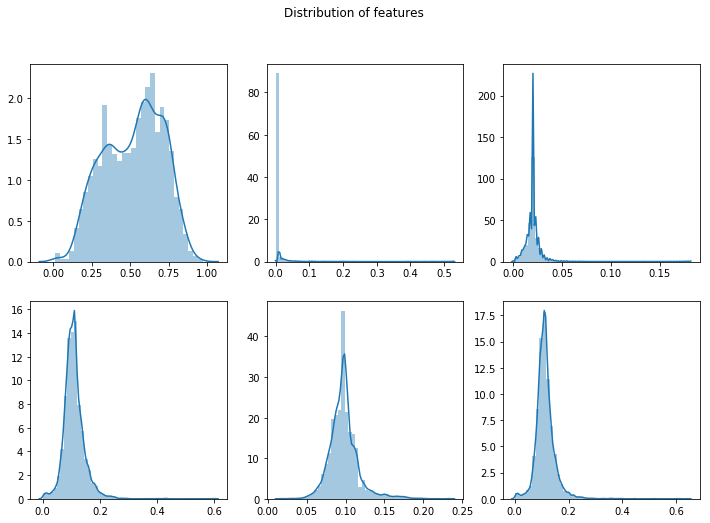

In [76]:
fig, axes = plt.subplots(2, 3, figsize=(12,8))

k=0

for i in range(2):
    for j in range(3):
        seaborn.distplot(X.values[:,k], ax = axes[i,j])
        k = k + 1
plt.suptitle("Distribution of features")
plt.show()

#### 1.1.2 univariate distributions of all features by Class

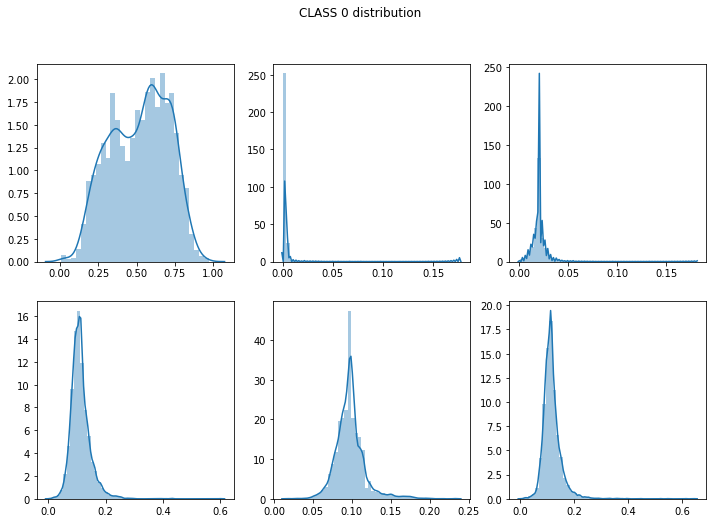

In [77]:
#CLASS 0
fig, axes = plt.subplots(2, 3, figsize=(12,8))

k=0

for i in range(2):
    for j in range(3):
        seaborn.distplot(X_0.values[:,k], ax = axes[i,j])
        k = k + 1
plt.suptitle("CLASS 0 distribution")
plt.show()

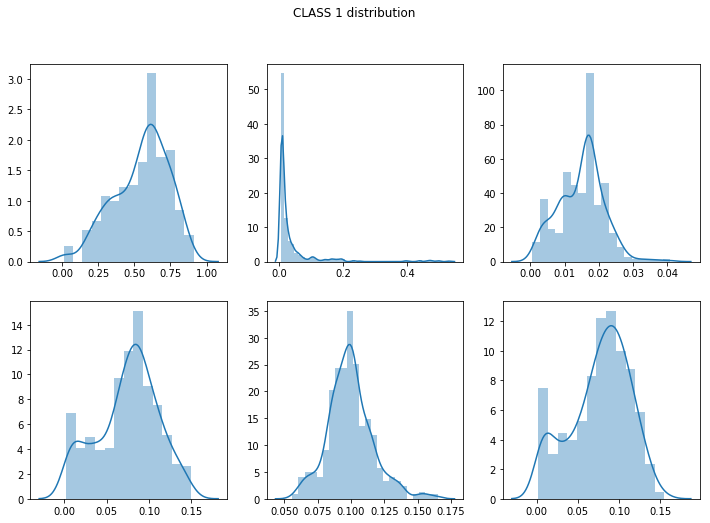

In [78]:
#CLASS 1
fig, axes = plt.subplots(2, 3, figsize=(12,8))

k=0

for i in range(2):
    for j in range(3):
        seaborn.distplot(X_1.values[:,k], ax = axes[i,j])
        k = k + 1
plt.suptitle("CLASS 1 distribution")
plt.show()

#### 1.1.3 PCA with first two principal components

Text(0.5,1,'PCA for 2 component')

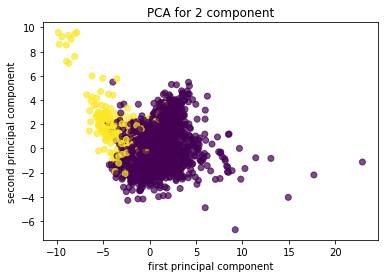

In [8]:
pipe_pca = make_pipeline(StandardScaler(), PCA(n_components=2))
X_pca = pipe_pca.fit_transform(X) 
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y[0], alpha=.7) 
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.title("PCA for 2 component")

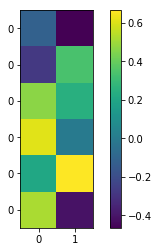

In [80]:
#???????????????????
components = pipe_pca.named_steps['pca'].components_
plt.imshow(components.T)
plt.yticks(range(6), y[0]) 
plt.colorbar()

#### 1.1.4 PCA explained variance ratio

In [81]:
pca = make_pipeline(StandardScaler(), PCA())
X_pca_all = pca.fit(X)

Text(0.5,1,'explained variance ratio for PCA')

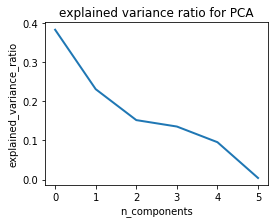

In [82]:
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.plot(pca.named_steps['pca'].explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio')
plt.title("explained variance ratio for PCA")

##### 3 fetures might be the good threshold for PCA

#### 1.2.1 t-SNE with perplexity = 30.0

In [62]:
tsne = make_pipeline(StandardScaler(), TSNE(n_components= 2))
X_tsne = tsne.fit_transform(X)

Text(0.5,1,'t-SNE for 2 component as perplexity=30.0')

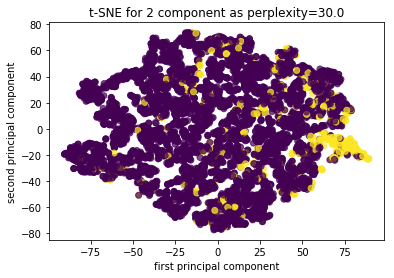

In [78]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y[0], alpha=.7) 
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.title("t-SNE for 2 component as perplexity=30.0")

#### 1.2.2 t-SNE with perplexity = 100

In [67]:
tsne_100 = make_pipeline(StandardScaler(), TSNE(n_components= 2, perplexity= 100))
X_tsne_100 = tsne_100.fit_transform(X)

Text(0.5,1,'t-SNE for 2 component as perplexity=100')

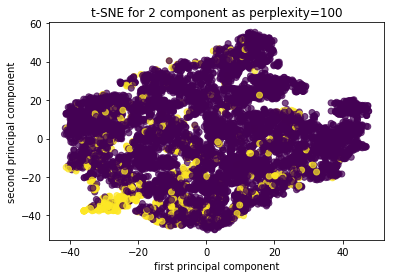

In [79]:
plt.scatter(X_tsne_100[:, 0], X_tsne_100[:, 1], c=y[0], alpha=.7) 
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.title("t-SNE for 2 component as perplexity=100")

#### 1.2.3 t-SNE with perplexity = 5

In [68]:
tsne_5 = make_pipeline(StandardScaler(), TSNE(n_components= 2, perplexity= 5))
X_tsne_5 = tsne_5.fit_transform(X)

Text(0.5,1,'t-SNE for 2 component as perplexity=100')

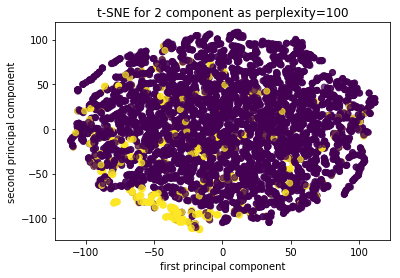

In [80]:
plt.scatter(X_tsne_5[:, 0], X_tsne_5[:, 1], c=y[0], alpha=.7) 
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.title("t-SNE for 2 component as perplexity=100")

#### 1.2.4 t-SNE with perplexity = 200

In [69]:
tsne_200 = make_pipeline(StandardScaler(), TSNE(n_components= 2, perplexity= 200))
X_tsne_200 = tsne_200.fit_transform(X)

Text(0.5,1,'t-SNE for 2 component as perplexity=200')

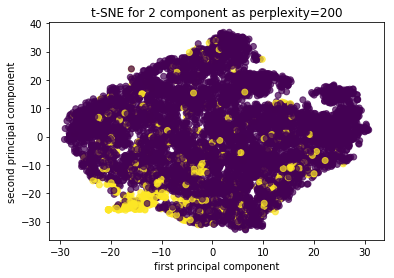

In [81]:
plt.scatter(X_tsne_200[:, 0], X_tsne_200[:, 1], c=y[0], alpha=.7) 
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.title("t-SNE for 2 component as perplexity=200")

### 2. Clustering

### 1.Unsupervised

In [82]:
from sklearn.base import clone
from sklearn.utils import check_random_state

def cluster_stability(X, est, n_iter=20, random_state=None):
    labels = []
    indices = []
    for i in range(n_iter):
        # draw bootstrap samples, store indices
        sample_indices = rng.randint(0, X.shape[0], X.shape[0])
        indices.append(sample_indices)
        est = clone(est)
        if hasattr(est, "random_state"):
            # randomize estimator if possible
            est.random_state = rng.randint(1e5)
        X_bootstrap = X[sample_indices]
        est.fit(X_bootstrap)
        # store clustering outcome using original indices
        relabel = -np.ones(X.shape[0], dtype=np.int)
        relabel[sample_indices] = est.labels_
        labels.append(relabel)
    scores = []
    for l, i in zip(labels, indices):
        for k, j in zip(labels, indices):
            # we also compute the diagonal which is a bit silly
            in_both = np.intersect1d(i, j)
            scores.append(adjusted_rand_score(l[in_both], k[in_both]))
    return np.mean(scores)

In [83]:
from sklearn.metrics import silhouette_samples

def silhouette_plot(X, cluster_labels, ax=None):
    silhouette_scores = silhouette_samples(X, cluster_labels)
    if ax is None:
        ax = plt.gca()
    y_lower = 10
    inliers = cluster_labels != -1
    X = X[inliers]
    cluster_labels = cluster_labels[inliers]
    silhouette_scores = silhouette_scores[inliers]
    labels = np.unique(cluster_labels)
    cm = plt.cm.Vega10 if len(labels) <= 10 else plt.cm.Vega20
    for i in labels:
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            silhouette_scores[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm(i)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

####  K-means 

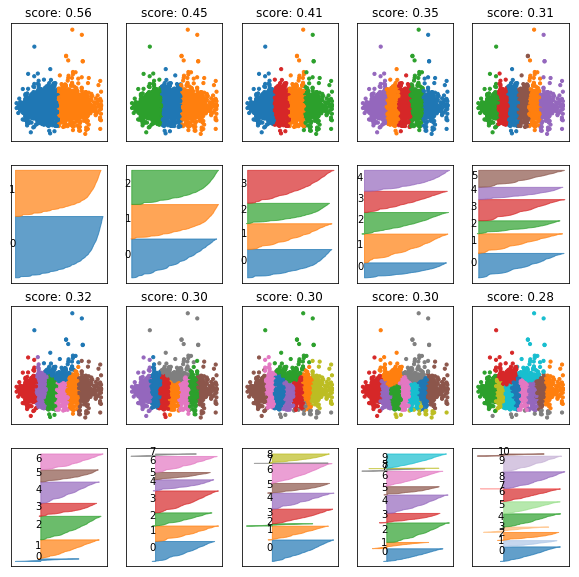

In [166]:
fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks':()}, figsize=(10, 10))
axes = np.hstack([axes[:2], axes[2:]]).T
X_pca = PCA(n_components=2).fit_transform(X)

for ax, n_clusters in zip(axes, range(2, 13)):
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=plt.cm.Vega10(km.labels_), s=10)
    silhouette_plot(X, km.labels_, ax=ax[1])
    ax[0].set_title("score: {:.2f}".format(silhouette_score(X, km.labels_)))

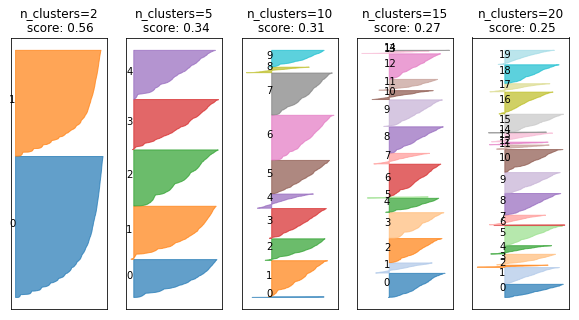

In [78]:
fig, axes = plt.subplots(1, 5, subplot_kw={'xticks': (), 'yticks':()}, figsize=(10, 5))
for ax, n_clusters in zip(axes, [2, 5, 10, 15, 20]):
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    silhouette_plot(X, km.labels_, ax=ax)
    ax.set_title("n_clusters={}\n score: {:.2f}".format(n_clusters, silhouette_score(X, km.labels_)))

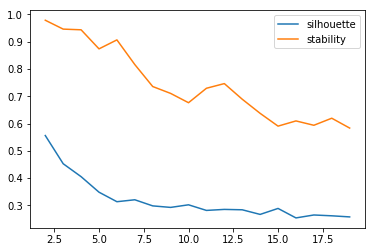

In [103]:
rng = np.random.RandomState(6)
sils,stability = [],[]
for i in range(2,20):
    km = KMeans(n_clusters=i)
    stability.append(cluster_stability(X, km))
    km.fit(X)
    sils.append(silhouette_score(X, km.labels_))

plt.plot(range(2,20),sils, label="silhouette")
plt.plot(range(2,20),stability, label="stability")
plt.legend()

n = 2 and 3 have higher silhouette_score and stability value

Text(0.5,1,'n_cluster = 2')

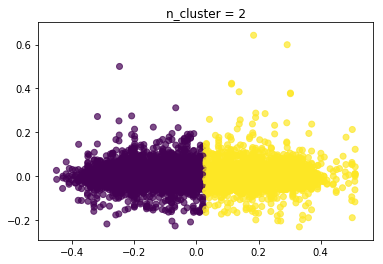

In [235]:
X_pca = PCA(n_components=2).fit_transform(X)
km = KMeans(n_clusters=2).fit(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=km.labels_, alpha=.7)
plt.title('n_cluster = 2')

In [236]:
pd.DataFrame(km.labels_)[0].value_counts()

0    4113
1    3087
Name: 0, dtype: int64

Text(0.5,1,'n_cluster = 3')

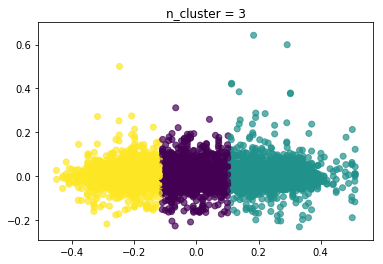

In [237]:
X_pca = PCA(n_components=2).fit_transform(X)
km = KMeans(n_clusters=3).fit(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=km.labels_, alpha=.7)
plt.title('n_cluster = 3')

In [238]:
pd.DataFrame(km.labels_)[0].value_counts()

0    2608
1    2304
2    2288
Name: 0, dtype: int64

#### Agglomerative Clustering

Text(0.5,1,'Hierarchical Clustering Dendrogram')

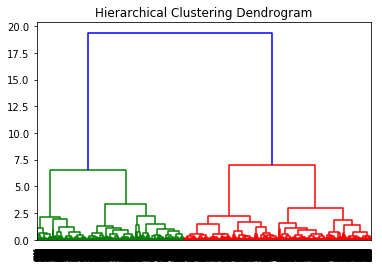

In [112]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
Z = hierarchy.linkage(X, 'ward') 
dn = dendrogram(Z,truncate_mode='level')
plt.title('Hierarchical Clustering Dendrogram')

/Users/zhaoqinwei/anaconda3/lib/python3.6/site-packages/sklearn/cluster/hierarchical.py:193: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')
/Users/zhaoqinwei/anaconda3/lib/python3.6/site-packages/sklearn/cluster/hierarchical.py:193: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


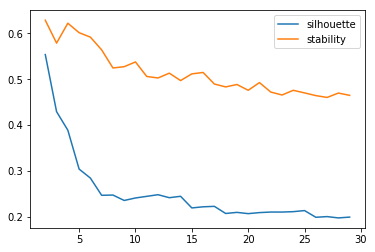

In [108]:
from sklearn.neighbors import kneighbors_graph
rng = np.random.RandomState(6)

sils,stability = [],[]
for i in range(2,30):
    agg = AgglomerativeClustering(n_clusters=i, connectivity=lambda x: kneighbors_graph(x, 10)).fit(X) 
    stability.append(cluster_stability(X, agg))
    agg.fit(X)
    sils.append(silhouette_score(X, agg.labels_))

plt.plot(range(2,30),sils, label="silhouette")
plt.plot(range(2,30),stability, label="stability")
plt.legend()

### DBSCAN

In [132]:
rng = np.random.RandomState(6)
epses = np.logspace(-2, -1, 10)

sils,stability = [],[]
for i in range(10):
    dbs = DBSCAN(eps=epses[i])
    stability.append(cluster_stability(X, dbs))
    dbs.fit(X)
    sils.append(silhouette_score(X, dbs.labels_))

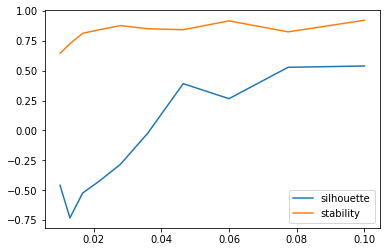

In [133]:
plt.plot(epses,sils, label="silhouette")
plt.plot(epses,stability, label="stability")
plt.legend()

### 2. Supervised

#### Kmeans

In [41]:
NMI = []
ARI = []
AMI = []
for n_clusters in range(2,20):
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X)
    nmi = normalized_mutual_info_score(y[0].values, cluster_labels)
    NMI.append(nmi)
    ari = adjusted_rand_score(y[0].values, cluster_labels)
    ARI.append(ari)
    ami = adjusted_mutual_info_score(y[0].values, cluster_labels)
    AMI.append(ami)

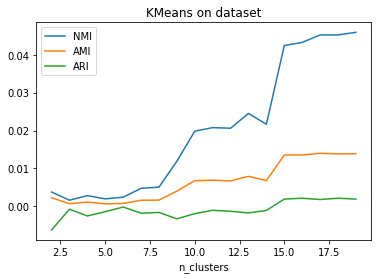

In [43]:
plt.plot(range(2,20),NMI, label ='NMI')
plt.plot(range(2,20),AMI, label ='AMI')
plt.plot(range(2,20),ARI, label ='ARI')

plt.xlabel('n_clusters')
plt.title('KMeans on dataset')
plt.legend()

From plot, n_cluster = 13 has the most improvments on the value of three parameters. 

Text(0.5,1,'n_cluster = 13')

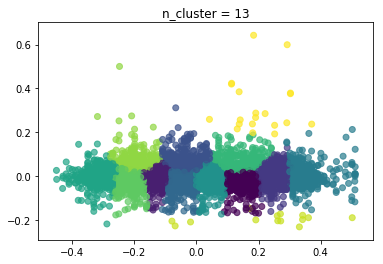

In [172]:
X_pca = PCA(n_components=2).fit_transform(X)
km = KMeans(n_clusters=13).fit(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=km.labels_, alpha=.7)
plt.title('n_cluster = 13')

#### Agglomerative Clustering

In [207]:
NMI = []
ARI = []
AMI = []
for i in range(2,20):
    clusterer = AgglomerativeClustering(n_clusters=i, connectivity=lambda x: kneighbors_graph(x, 10),linkage='ward')
    cluster_labels = clusterer.fit_predict(X)
    nmi = normalized_mutual_info_score(y[0].values, cluster_labels)
    NMI.append(nmi)
    ari = adjusted_rand_score(y[0].values, cluster_labels)
    ARI.append(ari)
    ami = adjusted_mutual_info_score(y[0].values, cluster_labels)
    AMI.append(ami)

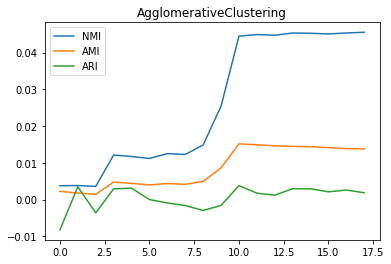

In [208]:
plt.plot(NMI, label ='NMI')
plt.plot(AMI, label ='AMI')
plt.plot(ARI, label ='ARI')

plt.title('AgglomerativeClustering')
plt.legend()

n = 12, NMI, AMI, ARI reach maximum

Text(0.5,1,'Scaled PCA')

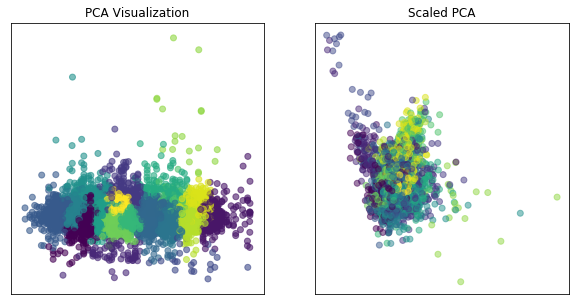

In [216]:
fig, axes = plt.subplots(1, 2, subplot_kw={'xticks': (), 'yticks':()}, figsize=(10, 5))
pca_scaled = make_pipeline(StandardScaler(), PCA(n_components=2))
X_pca_scaled = pca_scaled.fit_transform(X)
X_pca=PCA(n_components=2).fit_transform(X)
Agg = AgglomerativeClustering(n_clusters=i, connectivity=lambda x: kneighbors_graph(x, 10),linkage='ward').fit(X)
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=Agg.labels_, alpha=.6)
axes[0].set_title("PCA Visualization")
axes[1].scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=Agg.labels_, alpha=.5)
axes[1].set_title("Scaled PCA")

#### DBSCAN

In [181]:
NMI = []
ARI = []
AMI = []
epses = np.logspace(-3, -1, 20)
for i in range(20):
    clusterer = DBSCAN(eps=epses[i])
    cluster_labels = clusterer.fit_predict(X)
    nmi = normalized_mutual_info_score(y[0].values, cluster_labels)
    NMI.append(nmi)
    ari = adjusted_rand_score(y[0].values, cluster_labels)
    ARI.append(ari)
    ami = adjusted_mutual_info_score(y[0].values, cluster_labels)
    AMI.append(ami)

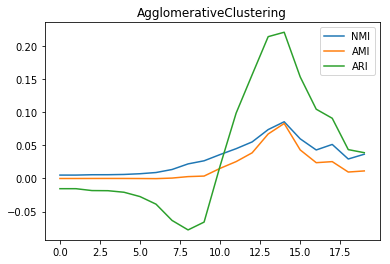

In [182]:
plt.plot(range(20),NMI, label ='NMI')
plt.plot(range(20),AMI, label ='AMI')
plt.plot(range(20),ARI, label ='ARI')

plt.title('AgglomerativeClustering')
plt.legend()

when epses = 0.0297, three parameters reach maximum

Text(0.5,1,'Scaled PCA')

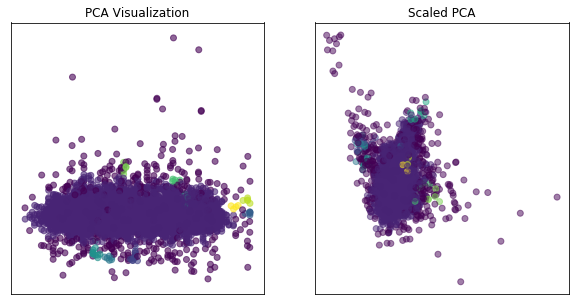

In [199]:
fig, axes = plt.subplots(1, 2, subplot_kw={'xticks': (), 'yticks':()}, figsize=(10, 5))
pca_scaled = make_pipeline(StandardScaler(), PCA(n_components=2))
X_pca_scaled = pca_scaled.fit_transform(X)
X_pca=PCA(n_components=2).fit_transform(X)
dbs = DBSCAN(eps=0.0297635144).fit(X)
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=dbs.labels_, alpha=.6)
axes[0].set_title("PCA Visualization")
axes[1].scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=dbs.labels_, alpha=.5)
axes[1].set_title("Scaled PCA")

 ### Part 3 Outlier Detection

In [304]:
y[0] = y[0].replace(1, '-1')
y[0] = y[0].replace(0,  1)

In [305]:
print(y[0].value_counts())

1     6666
-1     534
Name: 0, dtype: int64


In [306]:
y[0] = pd.to_numeric(y.values.reshape(y.shape[0]))

#### 3.1.1Elliptic Envelope unsupervised

In [307]:
#The proportion of outliers
print(y[0].value_counts())
out_rate = 534/7200
out_rate

 1    6666
-1     534
Name: 0, dtype: int64


0.07416666666666667

In [308]:
ee = EllipticEnvelope(contamination= out_rate).fit(X) 
ee_pred = ee.predict(X)
print(np.mean(ee_pred == -1))

0.07416666666666667


In [309]:
ee_df = pd.DataFrame(ee_pred)
ee_df
print(ee_df[0].value_counts())

 1    6666
-1     534
Name: 0, dtype: int64


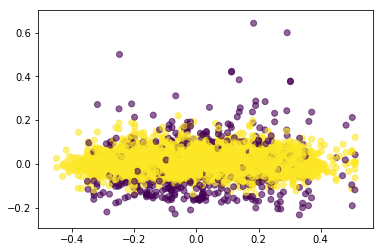

In [310]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= ee_pred, alpha = 0.6 )

#### 3.1.2 OneClassSVM unsupervised

In [311]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [312]:
ocs = OneClassSVM(nu = out_rate).fit(X_scaled)
ocs_pred = ocs.predict(X_scaled)
print(np.mean(ocs_pred == -1))

0.07458333333333333


In [313]:
ocs_df = pd.DataFrame(ocs_pred)
ocs_df
print(ocs_df[0].value_counts())


 1    6663
-1     537
Name: 0, dtype: int64


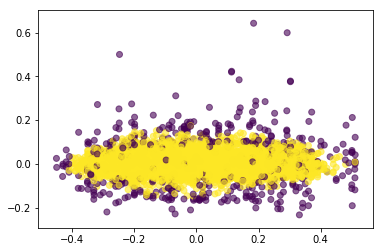

In [314]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= ocs_pred, alpha = 0.6)

#### 3.1.3 Isolation Forests unsupervised

In [315]:
ilf = IsolationForest(n_estimators=200, max_samples= 256, contamination=out_rate).fit(X)
ilf_pred = ilf.predict(X)
print(np.mean(ilf_pred == -1))

0.07416666666666667


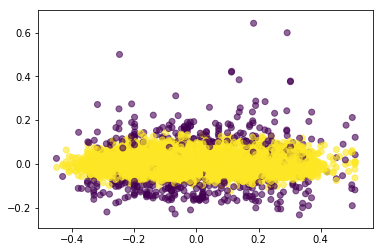

In [316]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= ilf_pred, alpha = 0.6)

 #### Q: Without using the ground-truth, can you tell which one gave the best results? Why?
 #### A:It hard to tell which model gives the best result, because there's no ground truth to identify a data points as outlier or inlier. 

#### 3.2.1Elliptic Envelope supervised

In [317]:
#AUC and precision score
ee_auc = roc_auc_score(y, ee.decision_function(X))
ee_aps = average_precision_score(y, ee.decision_function(X))
print("AUC for Elliptic Encelope: {:.3f}".format(ee_auc))
print("Precision Score for Elliptic Encelope: {:.3f}".format(ee_aps))

AUC for Elliptic Encelope: 0.919
Precision Score for Elliptic Encelope: 0.993


#### 3.2.2 one class SVC supervised

In [318]:
ocs_auc = roc_auc_score(y, ocs.decision_function(X_scaled))
ocs_aps = average_precision_score(y, ocs.decision_function(X_scaled))
print("AUC for one class SVC: {:.3f}".format(ocs_auc))
print("Precision Score for one class SVC: {:.3f}".format(ocs_aps))

AUC for one class SVC: 0.565
Precision Score for one class SVC: 0.917


#### 3.2.3 Isolation Forests supervised

In [319]:
ilf_auc = roc_auc_score(y, ilf.decision_function(X))
ilf_aps = average_precision_score(y, ilf.decision_function(X))
print("AUC for isolation forest: {:.3f}".format(ilf_auc))
print("Precision Score for isolation forest: {:.3f}".format(ilf_aps))

AUC for isolation forest: 0.832
Precision Score for isolation forest: 0.984


### Part 4 Imbalanced Classification

In [18]:
data= sio.loadmat('annthyroid.mat')
X = pd.DataFrame(data['X'])
y = pd.Series(data['y'].T[0])

In [20]:
X_train,X_test, y_train, y_test = train_test_split(X,y, stratify=y)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5400, 6), (1800, 6), (5400,), (1800,))

#### 4.1.1 Logistic regression with imbalanced 

In [39]:
lr_pipe = make_pipeline(StandardScaler(), LogisticRegression())
#AUC
lr_cross_auc = cross_val_score(lr_pipe, X_train, y_train, cv=10, scoring = ("roc_auc"))
print("AUC for logistic regression(train): {:.3f}".format(np.mean(lr_cross_auc)))

C = {"logisticregression__C":np.logspace(-3,2,15)}
lr_grid_auc = GridSearchCV(lr_pipe, C, cv=10,scoring=("roc_auc"))
lr_grid_auc.fit(X_train,y_train)
print("AUC for logistic regression(test): {:.3f}".format(lr_grid_auc.score(X_test, y_test)))

AUC for logistic regression(train): 0.974
AUC for logistic regression(test): 0.978


In [38]:
#Average precision
lr_cross_pa = cross_val_score(lr_pipe, X_train, y_train, cv=10, scoring = ("average_precision"))
print("Average precision for logistic regression(train): {:.3f}".format(np.mean(lr_cross_pa)))

C = {"logisticregression__C":np.logspace(-3,2,15)}
lr_grid_pa = GridSearchCV(lr_pipe, C, cv=10,scoring=('average_precision'))
lr_grid_pa.fit(X_train,y_train)
print("Average precision for logistic regression(test): {:.3f}".format(lr_grid_pa.score(X_test, y_test)))

Average precision for logistic regression(train): 0.767
Average precision for logistic regression(test): 0.783


#### 4.1.2 Random forest with imbalanced

In [47]:
rf_cross_auc = cross_val_score(RandomForestClassifier(), X_train, y_train, cv=10, scoring = ("roc_auc"))
print("AUC for random forest(train): {:.3f}".format(np.mean(rf_cross_auc)))

n = {'n_estimators':[20, 50,100,150,200]}
rf_grid_auc = GridSearchCV(RandomForestClassifier(), n, cv=10,scoring=("roc_auc"))
rf_grid_auc.fit(X_train,y_train)
print("AUC for random forest (test): {:.3f}".format(rf_grid_auc.score(X_test, y_test)))

AUC for random forest(train): 0.996
AUC for random forest (test): 0.995


In [59]:
rf_cross_pa = cross_val_score(RandomForestClassifier(), X_train, y_train, cv=10, scoring = ("average_precision"))
print("average_precision for random forest(train): {:.3f}".format(np.mean(rf_cross_pa)))

param_grid = {'max_depth': [10,12,14,16,18]}
rf_grid_pa = GridSearchCV(RandomForestClassifier(),param_grid , cv=10,scoring=("average_precision"))
rf_grid_pa.fit(X_train,y_train)
print("average_precision for random forest (test): {:.3f}".format(lr_grid_pa.score(X_test, y_test)))

average_precision for random forest(train): 0.919
average_precision for random forest (test): 0.823


#### Logistic regresssion balanced

In [44]:
lr_pipe = make_pipeline(StandardScaler(), LogisticRegression(class_weight='balanced'))


C = {"logisticregression__C":np.logspace(-3,2,15)}
lr_grid_auc = GridSearchCV(lr_pipe, C, cv=10,scoring=("roc_auc"))
lr_grid_auc.fit(X_train,y_train)
print("AUC for logistic regression---balanced---(test): {:.3f}".format(lr_grid_auc.score(X_test, y_test)))

lr_grid_pa = GridSearchCV(lr_pipe, C, cv=10,scoring=('average_precision'))
lr_grid_pa.fit(X_train,y_train)
print("Average precision for logistic regression---balanced---(test): {:.3f}".format(lr_grid_pa.score(X_test, y_test)))

AUC for logistic regression---balanced---(test): 0.988
Average precision for logistic regression---balanced---(test): 0.823


#### Random forest balanced 

In [61]:
param_grid = {'max_depth': [10,12,14,16,18]}

rf_grid_auc = GridSearchCV(RandomForestClassifier(), param_grid, cv=10,scoring=("roc_auc"))
rf_grid_auc.fit(X_train,y_train)
print("AUC for random forest---balanced---(test): {:.3f}".format(lr_grid_auc.score(X_test, y_test)))

rf_grid_pa = GridSearchCV(RandomForestClassifier(),param_grid, cv=10,scoring=('average_precision'))
rf_grid_pa.fit(X_train,y_train)
print("Average precision for random forest---balanced---(test): {:.3f}".format(rf_grid_pa.score(X_test, y_test)))

AUC for random forest---balanced---(test): 0.988
Average precision for random forest---balanced---(test): 0.878


In [31]:
# lr_pipeline = make_pipeline(StandardScaler(), LogisticRegression())

# C = np.logspace(-3, 2, 10)
# lr_pipe = GridSearchCV(lr_pipeline , dict(logisticregression__C = C))

# lr_pipe.fit(X_train, y_train.values)
# lr_score = cross_val_score(lr_pipe, X_train, y_train, cv=10)
# lr_pred = lr_pipe.predict(X_test)

In [32]:
# lr_auc = roc_auc_score(y_test, lr_pred)
# lr_aps = average_precision_score(y_test, lr_pred)
# print("AUC for logistic regression: {:.3f}".format(lr_auc))
# print("Precision Score for logistic regression: {:.3f}".format(lr_aps))

In [41]:
# lr_ba_pipeline = make_imb_pipeline(RandomUnderSampler(), StandardScaler(), LogisticRegression())

# C = np.logspace(-3, 2, 10)
# lr_ba_pipe = GridSearchCV(lr_ba_pipeline , dict(logisticregression__C = C))

# lr_ba_pipe.fit(X_train, y_train.values)
# lr_ba_score = cross_val_score(lr_ba_pipe, X_train, y_train, cv=10)
# lr_ba_pred = lr_ba_pipe.predict(X_test)

In [40]:
# lr_ba_auc = roc_auc_score(y_test, lr_ba_pred)
# lr_ba_aps = average_precision_score(y_test, lr_ba_pred)
# print("AUC for logistic regression for balanced data: {:.3f}".format(lr_ba_auc))
# print("Precision Score for logistic regression for balanced data: {:.3f}".format(lr_ba_aps))

In [53]:
# rfc = RandomForestClassifier()

# rf_grid = {'n_estimators':[20, 50,100,150,200]}
# rf = GridSearchCV(rfc ,rf_grid)

# rf.fit(X_train, y_train)
# rf_score = cross_val_score(rf, X_train, y_train, cv=10)
# rf_pred = rf.predict(X_test)


In [54]:
# rf_auc = roc_auc_score(y_test, rf_pred)
# rf_aps = average_precision_score(y_test, rf_pred)
# print("AUC for logistic regression: {:.3f}".format(rf_auc))
# print("Precision Score for logistic regression: {:.3f}".format(rf_aps))

In [55]:
# rfc_pipe = make_imb_pipeline(RandomUnderSampler(),RandomForestClassifier())

# n_estimators= [20, 50,100,150,200]
# rf_pipe = GridSearchCV(rfc_pipe, dict(randomforestclassifier__n_estimators = n_estimators))

# rf_pipe.fit(X_train, y_train)
# rf_pipe_score = cross_val_score(rf_pipe, X_train, y_train, cv=10)
# rf_pipe_pred = rf_pipe.predict(X_test)

In [1]:
# rf_pipe_auc = roc_auc_score(y_test, rf_pipe_pred)
# rf_pipe_aps = average_precision_score(y_test, rf_pipe_pred)
# print("AUC for logistic regression: {:.3f}".format(rf_pipe_auc))
# print("Precision Score for logistic regression: {:.3f}".format(rf_pipe_aps))